customers spend & repayment behavior.
1. In the above dataset,
a. In case age is less than 18, replace it with mean of age values.
b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)
c. Incase the repayment amount is more than the limit, replace the repayment with the

In [5]:
import numpy as np
import pandas as pd

In [6]:
customeDF =  pd.read_csv('C:/Users/kanika2/Advance Case Study/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
spendDF =  pd.read_csv('C:/Users/kanika2/Advance Case Study/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv')
RepaymentDF =  pd.read_csv('C:/Users/kanika2/Advance Case Study/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv')

In [7]:
customeDF.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [8]:
#CustSpendDF.merge(RepaymentDF,how = 'inner', left_on = 'Customer', right_on='Customer')

In [9]:
spendDF.shape

(1500, 5)

In [10]:
spendDF.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [11]:
RepaymentDF.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


# a. In case age is less than 18, replace it with mean of age values.

In [12]:
np.where(customeDF['Age'] < 18 , customeDF['Age'].mean() , customeDF['Age'])

array([76.  , 71.  , 34.  , 47.  , 56.  , 70.  , 26.  , 67.  , 79.  ,
       54.  , 35.  , 51.  , 29.  , 46.49, 25.  , 52.  , 78.  , 34.  ,
       27.  , 27.  , 57.  , 27.  , 51.  , 53.  , 35.  , 38.  , 24.  ,
       36.  , 72.  , 25.  , 63.  , 41.  , 19.  , 34.  , 55.  , 60.  ,
       61.  , 47.  , 78.  , 37.  , 46.49, 50.  , 21.  , 28.  , 67.  ,
       49.  , 28.  , 42.  , 39.  , 69.  , 59.  , 50.  , 21.  , 46.  ,
       43.  , 60.  , 37.  , 32.  , 74.  , 28.  , 44.  , 39.  , 46.49,
       77.  , 41.  , 77.  , 54.  , 46.49, 33.  , 46.49, 34.  , 63.  ,
       75.  , 51.  , 36.  , 66.  , 35.  , 71.  , 60.  , 39.  , 65.  ,
       52.  , 37.  , 70.  , 59.  , 25.  , 27.  , 63.  , 72.  , 46.49,
       41.  , 78.  , 56.  , 31.  , 62.  , 54.  , 58.  , 51.  , 35.  ,
       36.  ])

In [13]:
customeDF['Age'].mean()

46.49

(customer’s limit provided in acquisition table is the per transaction limit on his card)



# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [14]:
CustSpendDF =  customeDF.merge(spendDF,how = 'inner', left_on = 'Customer', right_on='Customer')

In [15]:
CustSpendDF['Amount'] = np.where(CustSpendDF.Amount > CustSpendDF.Limit, CustSpendDF.Limit/2 , CustSpendDF.Amount)

In [16]:
CustSpendDF[CustSpendDF['Amount'] > CustSpendDF['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [17]:
CustSpendRepaymentDF =  CustSpendDF.merge(RepaymentDF,how = 'inner', left_on = 'Customer', right_on='Customer',suffixes=('', '_repayment'))

In [18]:
CustSpendRepaymentDF['Amount_repayment'] =  np.where(CustSpendRepaymentDF.Amount_repayment > CustSpendRepaymentDF.Limit, CustSpendRepaymentDF.Limit/2 , CustSpendRepaymentDF.Amount_repayment)

In [19]:
CustSpendRepaymentDF[CustSpendRepaymentDF['Amount_repayment'] > CustSpendRepaymentDF['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,SL No:,Month_repayment,Amount_repayment,Unnamed: 4


# 2. From the above dataset create the following summaries:
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


# a. How many distinct customers exist?

In [20]:
print(CustSpendRepaymentDF['Customer'].unique().tolist())

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100']


# b. How many distinct categories exist?

In [21]:
print(CustSpendRepaymentDF['Type'].unique().tolist())

['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS', 'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET', 'RENTAL', 'BIKE', 'AUTO', 'SHOPPING']


# c. What is the average monthly spend by customers?

In [22]:
spendDF['Month'] = pd.to_datetime(spendDF['Month'])

In [23]:
round(spendDF.groupby(spendDF['Month'].dt.month)['Amount'].mean().reset_index(),2)

,Month,Amount
0,1,256221.13
1,2,233037.22
2,3,246255.78
3,4,236671.85
4,5,241277.02
5,6,241329.18
6,7,268042.29
7,8,236056.33
8,9,219369.89
9,10,215352.49


# d. What is the average monthly repayment by customers?

In [24]:
RepaymentDF['Month'] = pd.to_datetime(RepaymentDF['Month'])

In [25]:
CustSpendRepaymentDF['Month_repayment'] = pd.to_datetime(CustSpendRepaymentDF['Month_repayment'])

In [26]:
RepaymentDF.groupby(RepaymentDF['Month'].dt.month)['Amount'].mean()

Month
1.0     245121.019624
2.0     248756.162368
3.0     241654.966393
4.0     259649.413200
5.0     257669.622782
6.0     220647.477083
7.0     253512.325102
8.0     254564.734898
9.0     226865.354750
10.0    240307.718333
11.0    229867.344524
12.0    286557.952500
Name: Amount, dtype: float64

In [27]:
CustSpendRepaymentDF.groupby(CustSpendRepaymentDF['Month_repayment'].dt.month)['Amount'].mean()

Month_repayment
1     158846.874087
2     148203.252339
3     157928.339875
4     139171.312038
5     167460.517085
6     130093.935878
7     155977.880854
8     155709.070256
9     134794.006634
10    145792.656730
11    152814.480491
12    153766.949312
Name: Amount, dtype: float64

In [28]:
RepaymentDF.groupby(RepaymentDF['Month'].dt.month)['Amount'].mean()

Month
1.0     245121.019624
2.0     248756.162368
3.0     241654.966393
4.0     259649.413200
5.0     257669.622782
6.0     220647.477083
7.0     253512.325102
8.0     254564.734898
9.0     226865.354750
10.0    240307.718333
11.0    229867.344524
12.0    286557.952500
Name: Amount, dtype: float64

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [29]:
CustSpendRepaymentDF['Month'] = pd.to_datetime(CustSpendRepaymentDF['Month'])

In [30]:
CustSpendRepaymentDF['MonthForRate'] =  CustSpendRepaymentDF['Month'].dt.month

In [33]:
spend = CustSpendRepaymentDF.groupby('MonthForRate')['Amount'].sum().reset_index()
repayment = CustSpendRepaymentDF.groupby('MonthForRate')['Amount_repayment'].sum().reset_index()
newdf =  pd.DataFrame(repayment).merge(pd.DataFrame(spend) , left_on = 'MonthForRate', right_on = 'MonthForRate', how = 'left')
newdf['monthlyProfit'] = repayment['Amount_repayment'] - spend['Amount']
newdf['actualProfit'] = np.where(newdf['monthlyProfit'] > 0, 
                                 newdf['monthlyProfit'] + (newdf['monthlyProfit'] * 0.029), newdf['monthlyProfit'])
newdf.head()

,MonthForRate,Amount_repayment,Amount,monthlyProfit,actualProfit
0,1,1.294079e+09,1.339083e+09,-4.500364e+07,-4.500364e+07
1,2,1.005749e+09,9.257089e+08,8.004054e+07,8.236171e+07
2,3,7.938689e+08,7.609884e+08,3.288055e+07,3.383408e+07
3,4,5.525233e+08,5.295670e+08,2.295636e+07,2.362210e+07
4,5,8.750162e+08,8.536754e+08,2.134078e+07,2.195966e+07


# f. What are the top 5 product types?

In [34]:
customerSpendDF =  customeDF.merge(spendDF,how = 'left', left_on = 'Customer', right_on='Customer')

In [35]:
customerSpendRepaymentDF =  customerSpendDF.merge(RepaymentDF,how = 'left', left_on = 'Customer', right_on='Customer')

In [36]:
customerSpendRepaymentDF.groupby('Type')['Amount_x'].sum().nlargest(n=5)

Type
PETRO           1.185036e+09
CAMERA          1.096149e+09
FOOD            9.507946e+08
TRAIN TICKET    8.520288e+08
AIR TICKET      8.117523e+08
Name: Amount_x, dtype: float64

# g. Which city is having maximum spend?


In [37]:
CustSpendRepaymentDF.groupby('City')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = False).head(1)

,City,Amount
4,COCHIN,1.175903e+09


# h. Which age group is spending more money?


In [38]:
bins = [18,30,40,50,np.inf]
values =['18-30','30-40','40-50','50+']
CustSpendRepaymentDF['age_range'] = pd.cut(CustSpendRepaymentDF['Age'],bins,labels=values)
CustSpendRepaymentDF.groupby('age_range')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = False)

,age_range,Amount
3,50+,1.656342e+09
0,18-30,1.585074e+09
2,40-50,1.134190e+09
1,30-40,9.127705e+08


# i. Who are the top 10 customers in terms of repayment?

In [39]:
RepaymentDF.groupby('Customer')['Amount'].sum().reset_index().sort_values(by = 'Amount' , ascending = False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [40]:
CustSpendRepaymentDF['Month'] = pd.to_datetime(CustSpendRepaymentDF['Month'])

In [41]:
CustSpendRepaymentDF.rename(columns = {'Month':'Year'}, inplace = True)

In [42]:
 CustSpendRepaymentCityWise_pivotDF= pd.pivot_table(CustSpendRepaymentDF, values=['Amount'],index = ['City',CustSpendRepaymentDF['Year'].dt.year],
                    columns=['Product'],
                          aggfunc='sum')

In [43]:
import matplotlib.pyplot as plt

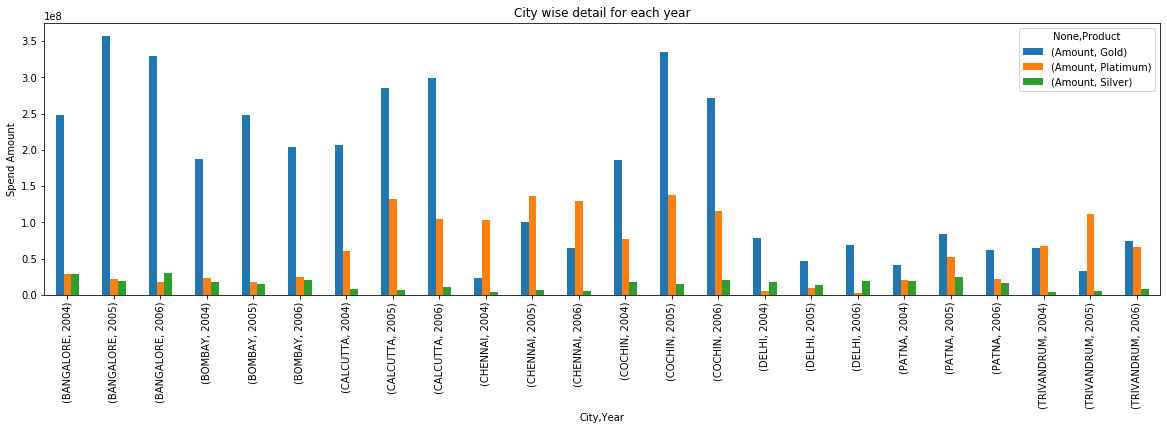

In [44]:
CustSpendRepaymentCityWise_pivotDF.plot(kind='bar',figsize = (20,5))
plt.ylabel('Spend Amount')
plt.title('City wise detail for each year')
plt.show()

# 4. Create graphs for 
a. Monthly comparison of total spends, city wise

In [45]:
monthlyComparisionCityWisePivotDF = pd.pivot_table(CustSpendRepaymentDF,index=['City',CustSpendRepaymentDF['Year'].dt.month],values='Amount',aggfunc='sum')

In [46]:
monthlyComparisionCityWisePivotDF.head()

Amount
City      Year              
BANGALORE 1     2.308396e+08
          2     1.808167e+08
          3     1.478226e+08
          4     1.088377e+08
          5     1.842610e+08

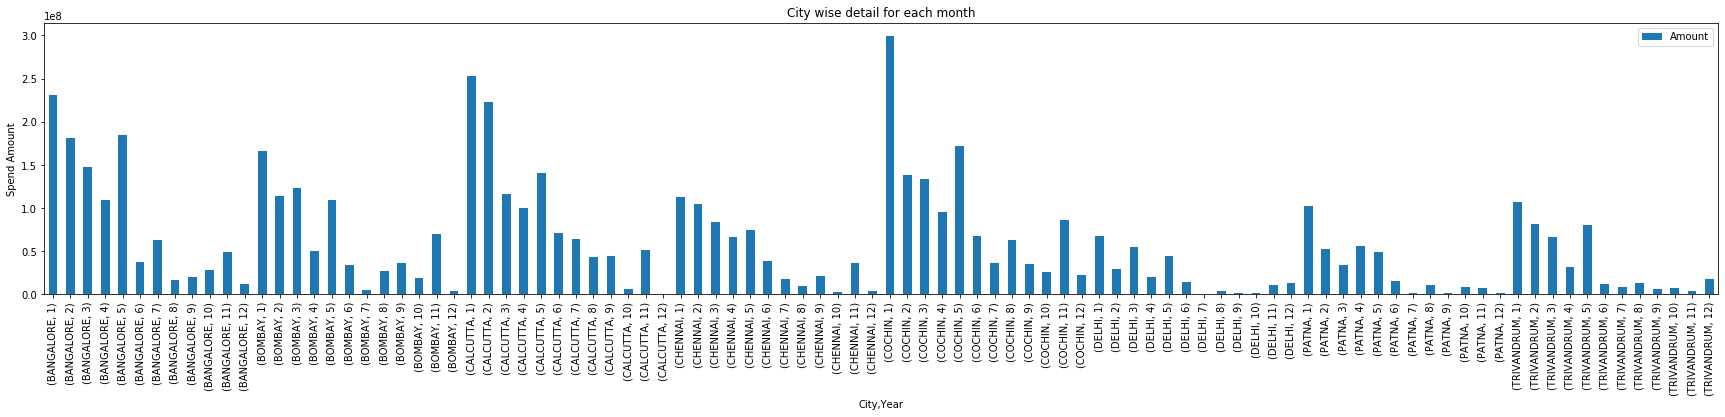

In [47]:
monthlyComparisionCityWisePivotDF.plot(kind='bar',figsize = (30,5))
plt.ylabel('Spend Amount')
plt.title('City wise detail for each month')
plt.show()

# b. Comparison of yearly spend on air tickets

In [48]:
yearlySpendPivotDF = pd.pivot_table(CustSpendRepaymentDF[CustSpendRepaymentDF['Type'] =='AIR TICKET'],
                                     index=[CustSpendRepaymentDF['Year'].dt.year]
                                       ,values='Amount',
                                          aggfunc='sum')

In [49]:
yearlySpendPivotDF

,Amount
Year,
2004,1.126823e+08
2005,2.878031e+08
2006,1.396326e+08


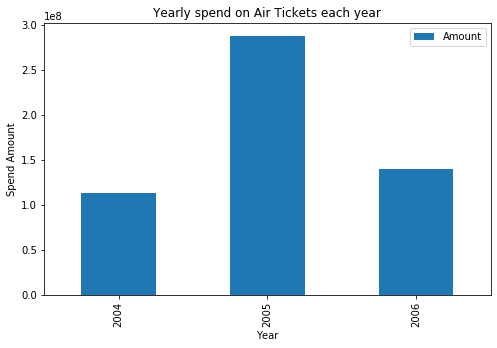

In [50]:
yearlySpendPivotDF.plot(kind='bar',figsize = (8,5))
plt.ylabel('Spend Amount')
plt.title('Yearly spend on Air Tickets each year')
plt.show()

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [51]:
monthlySpendOnProductsPivotDF = pd.pivot_table(CustSpendRepaymentDF,
                                     index=[CustSpendRepaymentDF['Year'].dt.year]
                                       ,values='Amount',
                                          aggfunc='sum')

In [52]:
monthlySpendOnProductsPivotDF

,Amount
Year,
2004,1.539769e+09
2005,2.217313e+09
2006,1.990905e+09


# 5. Write user defined PYTHON function to perform the following analysis:

# You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [54]:
CustSpendRepaymentDF['yearly'] =  CustSpendRepaymentDF.Year.apply(lambda x:x.year)
CustSpendRepaymentDF['monthly'] = CustSpendRepaymentDF.Year.apply(lambda x:x.month)
CustSpendRepaymentDF['Month'] =  CustSpendRepaymentDF['Year'].dt.month

In [59]:
def top10Customers(product_category,time_period) :
    return CustSpendRepaymentDF.loc[(CustSpendRepaymentDF.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount_repayment.sum().reset_index().sort_values('Amount_repayment',ascending=False).head(10)

In [65]:
product_category=str(input("Please Enter Gold/Silver/Platinum: "))
time_period=str(input("Please Enter yearly/monthly: "))

Please Enter Gold/Silver/Platinum: Gold
Please Enter yearly/monthly: monthly


In [68]:
top10Customers_Analysis = top10Customers(product_category,time_period)

In [72]:
top10Customers_Analysis

,Customer,City,Product,monthly,Amount_repayment
176,A60,CALCUTTA,Gold,1,98762907.40
186,A61,COCHIN,Gold,1,94852286.19
36,A13,BANGALORE,Gold,2,76576005.28
167,A45,COCHIN,Gold,1,67586678.96
187,A61,COCHIN,Gold,2,63234857.46
152,A43,BANGALORE,Gold,3,59429100.22
46,A14,BANGALORE,Gold,2,55602880.41
158,A44,DELHI,Gold,1,54213110.84
160,A44,DELHI,Gold,3,54213110.84
150,A43,BANGALORE,Gold,1,50939228.76


In [75]:
product_category=str(input("Please Enter Gold/Silver/Platinum: "))
time_period=str(input("Please Enter yearly/monthly: "))

Please Enter Gold/Silver/Platinum: Gold
Please Enter yearly/monthly: yearly


In [76]:
top10Customers_Analysis = top10Customers(product_category,time_period)
top10Customers_Analysis

,Customer,City,Product,yearly,Amount_repayment
64,A61,COCHIN,Gold,2005,1.580871e+08
65,A61,COCHIN,Gold,2006,1.580871e+08
10,A12,BOMBAY,Gold,2005,1.416909e+08
61,A60,CALCUTTA,Gold,2005,1.382681e+08
62,A60,CALCUTTA,Gold,2006,1.283918e+08
13,A13,BANGALORE,Gold,2005,1.244360e+08
16,A14,BANGALORE,Gold,2005,1.191490e+08
58,A45,COCHIN,Gold,2005,1.098284e+08
60,A60,CALCUTTA,Gold,2004,1.086392e+08
50,A42,BOMBAY,Gold,2006,1.066165e+08
